In [1]:
import numpy as np
import matplotlib.pyplot as plt

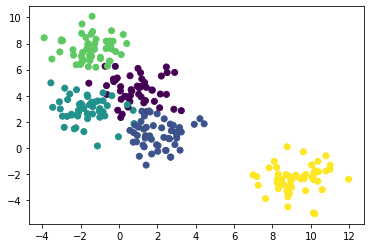

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=5, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

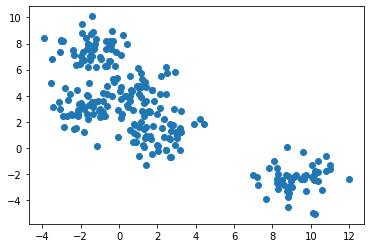

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## KMeans 聚类法

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [5]:
kmeans.labels_

array([4, 4, 0, 1, 2, 0, 1, 0, 3, 2, 4, 0, 3, 2, 1, 2, 2, 4, 2, 0, 0, 0,
       4, 1, 1, 1, 0, 3, 4, 1, 0, 0, 2, 3, 4, 2, 2, 4, 2, 2, 4, 3, 1, 0,
       0, 3, 3, 2, 0, 1, 0, 1, 1, 1, 3, 2, 3, 4, 0, 0, 0, 3, 2, 3, 3, 0,
       4, 3, 4, 0, 0, 2, 4, 2, 1, 0, 2, 1, 1, 4, 1, 4, 0, 3, 2, 0, 3, 4,
       2, 3, 0, 3, 1, 0, 4, 1, 3, 2, 0, 2, 4, 3, 2, 0, 3, 3, 0, 4, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 2, 3, 4, 4, 0, 2, 4, 3, 3, 4, 2, 2, 3, 4, 4,
       0, 2, 2, 4, 0, 1, 3, 3, 2, 0, 2, 1, 2, 3, 2, 0, 4, 0, 1, 0, 4, 3,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 0, 1, 4, 0, 1, 2, 3, 3, 4, 2, 2, 0, 4,
       4, 1, 4, 2, 1, 3, 1, 1, 0, 4, 3, 1, 2, 1, 1, 2, 3, 4, 4, 2, 1, 2,
       1, 3, 4, 2, 1, 1, 1, 4, 3, 2, 0, 4, 3, 3, 2, 0, 3, 4, 4, 0, 3, 4,
       3, 2, 0, 1, 3, 3, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 4, 4, 1, 2, 1,
       4, 1, 4, 3, 4, 3, 1, 1], dtype=int32)

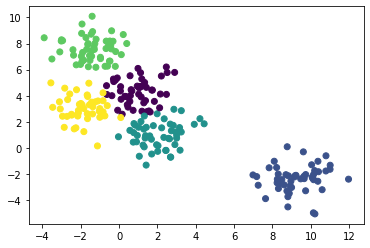

In [6]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

In [7]:
center = kmeans.cluster_centers_
center

array([[ 0.93226669,  4.273606  ],
       [ 9.27996402, -2.3764533 ],
       [ 2.05849588,  0.9767519 ],
       [-1.39550161,  7.57857088],
       [-1.85199006,  2.98013351]])

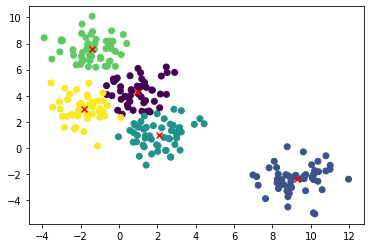

In [8]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
center = kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1], marker='x', c = 'red')
plt.show()


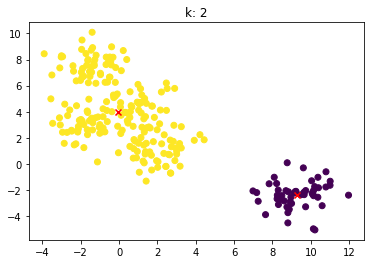

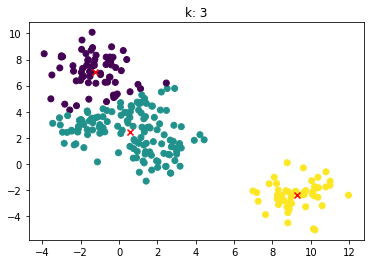

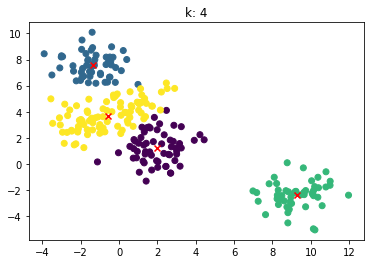

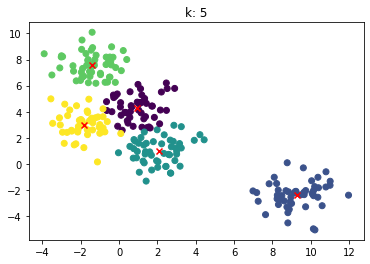

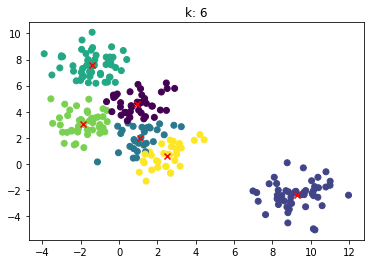

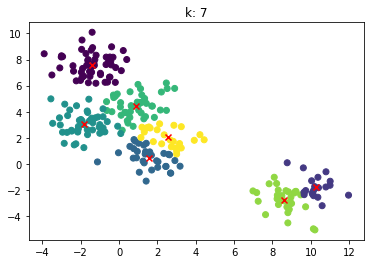

In [9]:
for n_clusters in [2, 3, 4, 5, 6, 7]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    z = clusterer.labels_
    center = clusterer.cluster_centers_
    plt.scatter(X[:,0], X[:,1], c=z)
    plt.scatter(center[:,0], center[:,1],marker = 'x', c='red')
    plt.title("k: {0}".format(n_clusters))
    plt.show()

## 层次聚类法

In [11]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(X)

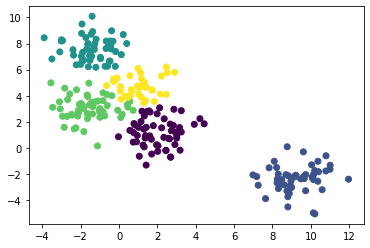

In [12]:
plt.scatter(X[:,0], X[:,1], c=agg.labels_)
plt.show()

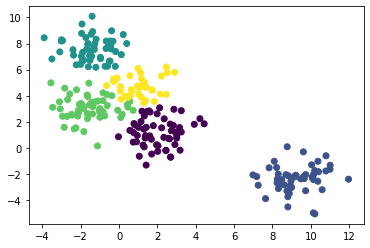

In [14]:
agg = AgglomerativeClustering(distance_threshold=10, n_clusters=None).fit(X)
plt.scatter(X[:,0], X[:,1], c=agg.labels_)
plt.show()

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
def show_dendrogram(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

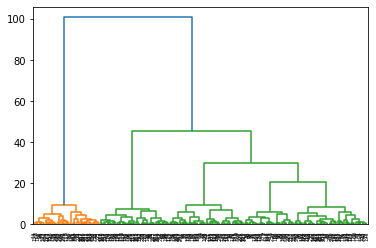

In [19]:
show_dendrogram(agg)

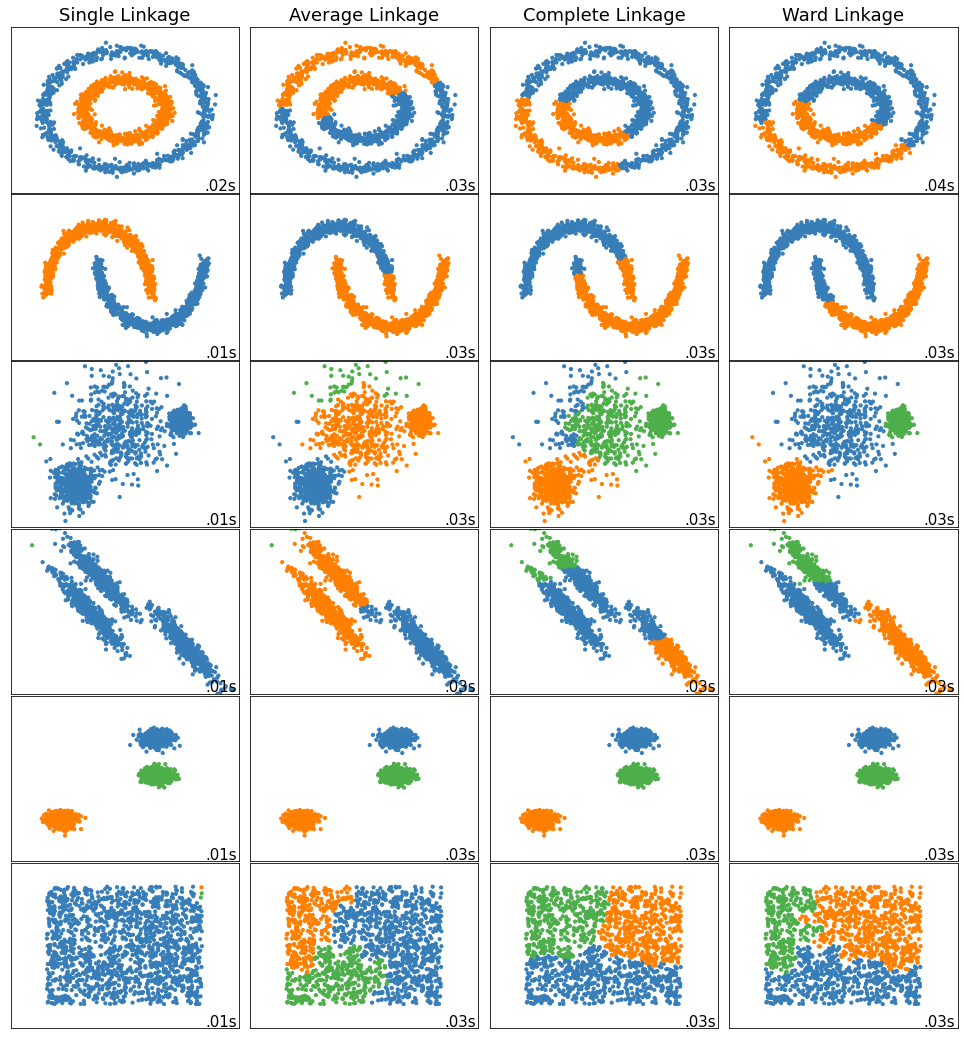

In [22]:
import time
import warnings

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()